<a href="https://colab.research.google.com/github/YoonSungLee/AI-Innovation-Square_Vision/blob/master/Day%209_Autoencoder%20%ED%99%9C%EC%9A%A9%ED%95%98%EA%B8%B0/denoising_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


# np.random.normal(mean, std, N) : 평균이 mean이고 표준편차가 std인 데이터 N개 생성
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.) # np.clip(data, 하한, 상한) : data를 하한과 상한 사이의 값으로 변환
x_test_noisy = np.clip(x_test_noisy, 0., 1.) # np.clip(data, 하한, 상한) : data를 하한과 상한 사이의 값으로 변환

Using TensorFlow backend.


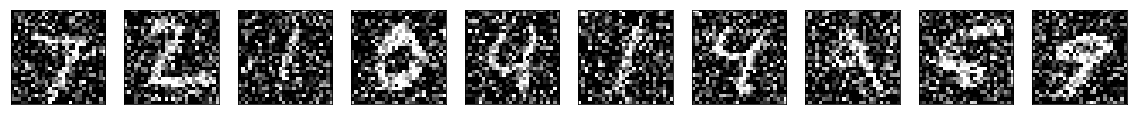

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

# N, 28, 28, 1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
# N, 28, 28, 32
x = MaxPooling2D((2, 2), padding='same')(x)
# N, 14, 14, 32
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# N, 14, 14, 32
encoded = MaxPooling2D((2, 2), padding='same')(x)
# N, 7, 7, 32

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
# N, 7, 7, 32
x = UpSampling2D((2, 2))(x)
# N, 14, 14, 32
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# N, 14, 14, 32
x = UpSampling2D((2, 2))(x)
# N, 28, 28, 32
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
# N, 28, 28, 1

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W0712 07:56:10.804126 139954493970304 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 07:56:10.823952 139954493970304 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 07:56:10.827231 139954493970304 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 07:56:10.846605 139954493970304 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0712 07:56:10.883203 139954493970304 deprecation_wrapp

In [0]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

W0712 07:56:11.167679 139954493970304 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1763 - val_loss: 0.1287
Epoch 2/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.1192 - val_loss: 0.1142
Epoch 3/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.1117 - val_loss: 0.1088
Epoch 4/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.1080 - val_loss: 0.1064
Epoch 5/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1056 - val_loss: 0.1037
Epoch 6/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.1041 - val_loss: 0.1024
Epoch 7/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1027 - val_loss: 0.1002
Epoch 8/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1019 - val_loss: 0.1007
Epoch 9/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.1012 - val_loss: 0.

In [0]:
decoded_imgs = autoencoder.predict(x_test_noisy)

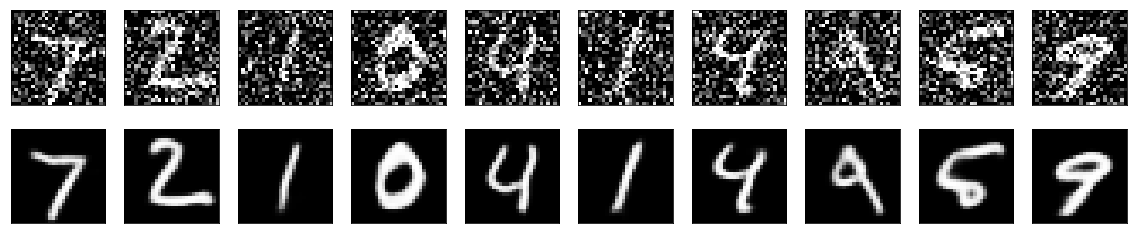

In [0]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

기존 이미지로 AutoEncoder를 생성하는 것보다 잡음을 포함시킨 이미지로 AutoEncoder를 생성하는 것이 성능이 뛰어난 모델을 만드는 데 하나의 방법이 될 수 있다.

* QT : user interface를 생성해주는 도구
* pyinstaller : python을 통해 exe 파일 생성